<a href="https://colab.research.google.com/github/tithi-jha/Multiple-Linear-Regression/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df_index=pd.read_csv("economic_index.csv")

In [ ]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [ ]:
## drop unecessary columns

df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [ ]:
## check null values
df_index.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


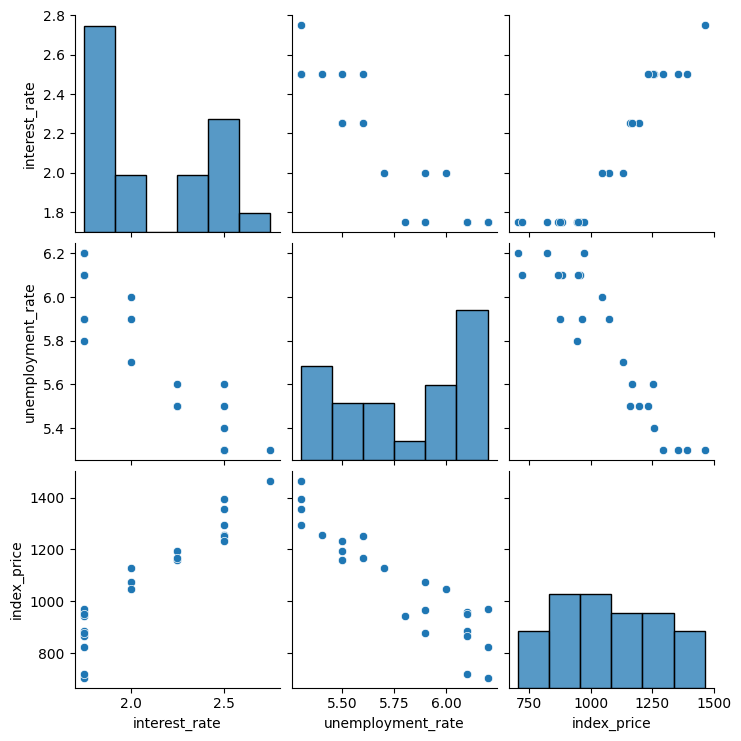

In [ ]:
## lets do some visualisation
import seaborn as sns
sns.pairplot(df_index)

In [ ]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0.5, 0, 'Unemployment Rate')

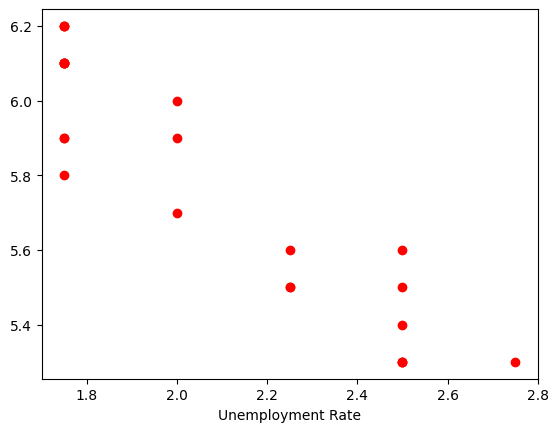

In [ ]:
## visualize the datapoints more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("Interest Rate")
plt.xlabel("Unemployment Rate")

In [ ]:
## independent and dependent features
X=df_index[['interest_rate','unemployment_rate']] ## one way
X=df_index.iloc[:,:-1] ## exclusing the last column frm table so -1
y=df_index.iloc[:,-1] ##take last column and put it in y

In [ ]:
X.head(),y

(   interest_rate  unemployment_rate
 0           2.75                5.3
 1           2.50                5.3
 2           2.50                5.3
 3           2.50                5.3
 4           2.50                5.4,
 0     1464
 1     1394
 2     1357
 3     1293
 4     1256
 5     1254
 6     1234
 7     1195
 8     1159
 9     1167
 10    1130
 11    1075
 12    1047
 13     965
 14     943
 15     958
 16     971
 17     949
 18     884
 19     866
 20     876
 21     822
 22     704
 23     719
 Name: index_price, dtype: int64)

In [ ]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
import seaborn as sns


In [ ]:
sns.regplot(df_index['interest_rate'],df_index['index_price'])

TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given

In [ ]:
sns.regplot(df_index['interest_rate'],df_index['unemployment_rate'])

In [ ]:
sns.regplot(df_index['index_price'],df_index['unemployment_rate'])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [ ]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [ ]:
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
# https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.cross_validate.html
# cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

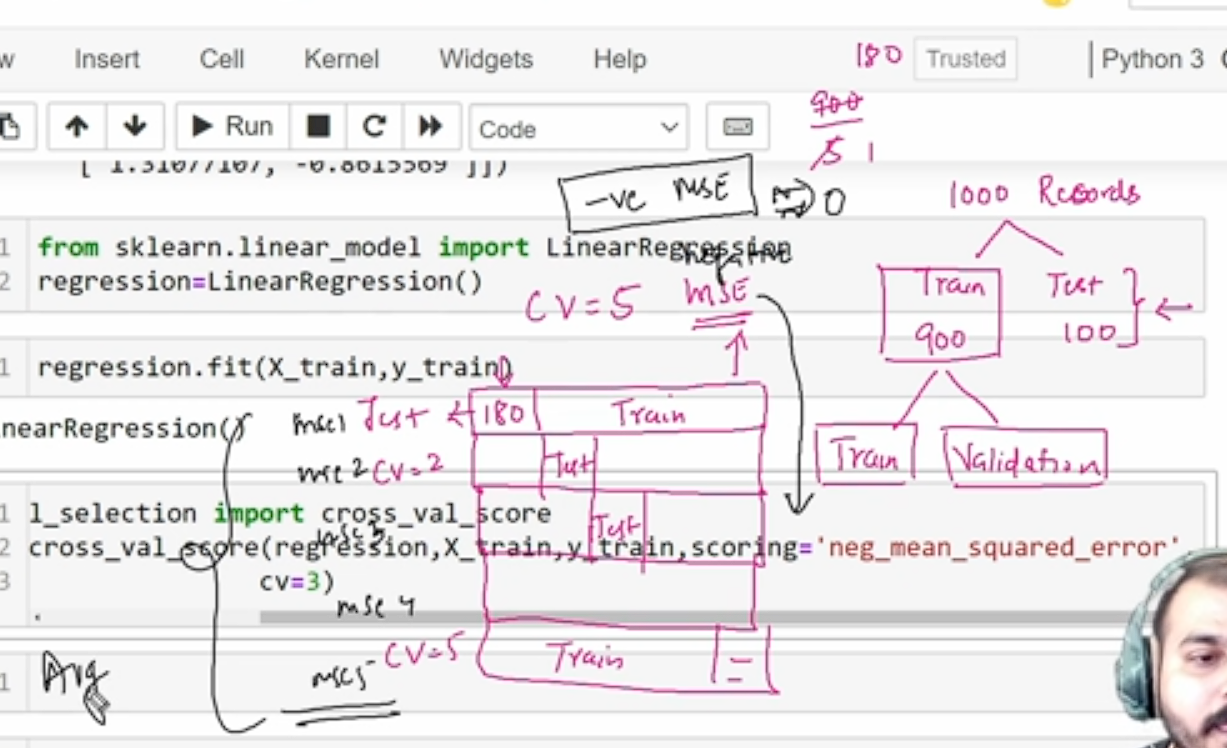

In [ ]:
np.mean(validation_score)

-5914.828180162386

In [ ]:
## prediction
y_pred=regression.predict(X_test)
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [ ]:
## performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
## display adjusted r-squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7591371539010257


0.5985619231683761

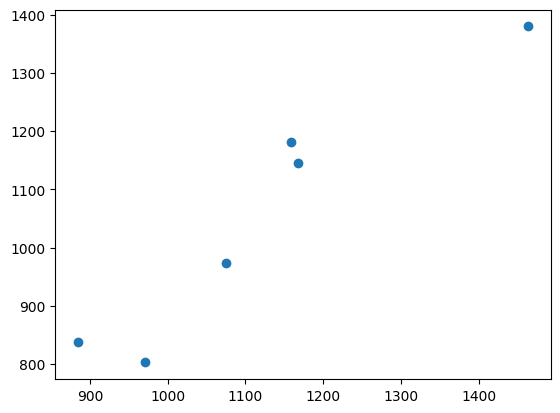

In [ ]:
## Assumption
plt.scatter(y_test,y_pred)

In [ ]:
residuals=y_test-y_pred
residuals

,index_price
8,-21.746681
16,168.257203
0,84.165430
18,45.474004
11,101.146860
9,22.036518


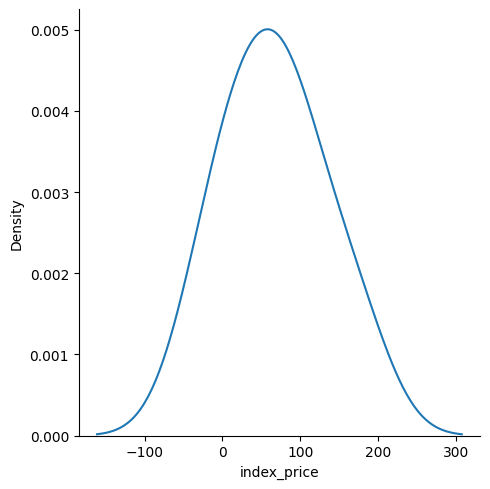

In [ ]:
##plot the residuals
sns.displot(residuals,kind='kde')

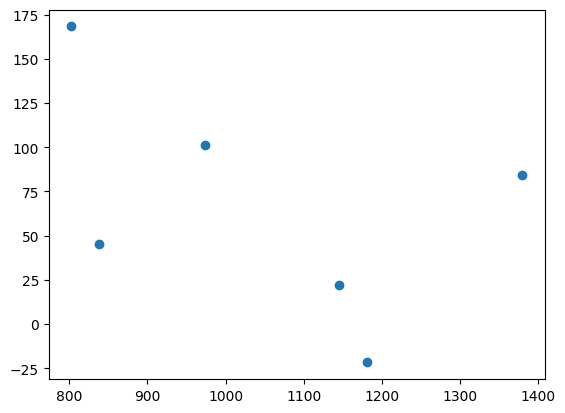

In [ ]:
## scatter plot wrt predictions and residuals
plt.scatter(y_pred,residuals)

here data is uniformly distributed(no pattern)

In [ ]:
##OLS linear regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()
model.predict(X_test)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 25 Oct 2024   Prob (F-statistic):                       0.754
Time:                        18:41:40   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
print(regression.coef_)

[  88.27275507 -116.25716066]
